### 準備 & 作成したデータの読み込み

In [1]:
#Cell_1.
%matplotlib notebook
# グラフをインラインで表示
# %matplotlib inline

import warnings
warnings.simplefilter('ignore')

import gc
import math
import pickle

# 本書 1-3 章の関数群を含む自作ライブラリ
import mylibs.mylib1 as mylib1
import mylibs.mylib2 as mylib2
import mylibs.mylib3 as mylib3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# 表示する行・列の数を設定
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# matplotlib のフォントを設定
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

## データの読み込みと加工

### 健診結果データの読み込み

In [2]:
#Cell_2.
df_hc = pd.read_csv('./pseudo_medical/records/incl_bp/healthckeckup.csv')

print(df_hc.shape)
df_hc.head()

(12632, 4)


,iid,hc_ym,dbp,sbp
0,i000000,2010/07,88,131
1,i000000,2011/07,81,138
2,i000000,2012/07,88,140
3,i000000,2013/07,70,127
4,i000002,2010/07,76,114


### df_info, df_commons を健診レコードを持つ者のみに絞り込む

In [3]:
#Cell_3.
df_info = pd.read_csv('./pseudo_medical/records/incl_bp/info.csv')
df_commons = pd.read_csv('./pseudo_medical/records/incl_bp/commons.csv')

print(len(df_hc.iid.unique()), len(
    df_info.iid.unique()), len(df_commons.iid.unique()))

2241 4815 4368


In [4]:
#Cell_4.
df_info = df_info[df_info['iid'].isin(df_hc['iid'])]
df_commons = df_commons[df_commons['iid'].isin(df_hc['iid'])]

print(len(df_hc.iid.unique()), len(
    df_info.iid.unique()), len(df_commons.iid.unique()))

2241 2241 2090


## ALB テーブル・エクスポージャテーブルを作成

In [5]:
#Cell_5.
# 分析開始時点 (2010年1月)
start_study_t = 2010
# 分析終了時点 (2019年12月)
end_study_t = 2019.999

npa_obs_ym = mylib1.create_npa_obs_ym(start_study_t, end_study_t)
df_info = mylib1.convert_ym_to_t_in_info(df_info)
df_alb_table = mylib1.create_alb_table_from_info(npa_obs_ym, df_info)
df_exposure_table = mylib1.create_exposure_table_from_alb_table(
    npa_obs_ym, df_alb_table)

In [6]:
#Cell_6.
print(npa_obs_ym)

['2010/01' '2010/02' '2010/03' '2010/04' '2010/05' '2010/06' '2010/07'
 '2010/08' '2010/09' '2010/10' '2010/11' '2010/12' '2011/01' '2011/02'
 '2011/03' '2011/04' '2011/05' '2011/06' '2011/07' '2011/08' '2011/09'
 '2011/10' '2011/11' '2011/12' '2012/01' '2012/02' '2012/03' '2012/04'
 '2012/05' '2012/06' '2012/07' '2012/08' '2012/09' '2012/10' '2012/11'
 '2012/12' '2013/01' '2013/02' '2013/03' '2013/04' '2013/05' '2013/06'
 '2013/07' '2013/08' '2013/09' '2013/10' '2013/11' '2013/12' '2014/01'
 '2014/02' '2014/03' '2014/04' '2014/05' '2014/06' '2014/07' '2014/08'
 '2014/09' '2014/10' '2014/11' '2014/12' '2015/01' '2015/02' '2015/03'
 '2015/04' '2015/05' '2015/06' '2015/07' '2015/08' '2015/09' '2015/10'
 '2015/11' '2015/12' '2016/01' '2016/02' '2016/03' '2016/04' '2016/05'
 '2016/06' '2016/07' '2016/08' '2016/09' '2016/10' '2016/11' '2016/12'
 '2017/01' '2017/02' '2017/03' '2017/04' '2017/05' '2017/06' '2017/07'
 '2017/08' '2017/09' '2017/10' '2017/11' '2017/12' '2018/01' '2018/02'
 '2018

In [7]:
#Cell_7.
print(df_alb_table.shape)
df_alb_table.head()

(2241, 131)


,iid,sex,family,birth_ym,start_obs_ym,end_obs_ym,death,bp_class,start_obs_t,end_obs_t,birth_t,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,2011/07,2011/08,2011/09,2011/10,2011/11,2011/12,2012/01,2012/02,2012/03,2012/04,2012/05,2012/06,2012/07,2012/08,2012/09,2012/10,2012/11,2012/12,2013/01,2013/02,2013/03,2013/04,2013/05,2013/06,2013/07,2013/08,2013/09,2013/10,2013/11,2013/12,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,2014/07,2014/08,2014/09,2014/10,2014/11,2014/12,2015/01,2015/02,2015/03,2015/04,2015/05,2015/06,2015/07,2015/08,2015/09,2015/10,2015/11,2015/12,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,2016/11,2016/12,2017/01,2017/02,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12
0,i000000,M,1,1952/06,2010/01,2013/09,0,1,2010.041667,2013.708333,1952.458333,57,57,57,57,57,58,58,58,58,58,58,58,58,58,58,58,58,59,59,59,59,59,59,59,59,59,59,59,59,60,60,60,60,60,60,60,60,60,60,60,60,61,61,61,61,61,61,61,61,61,61,61,61,62,62,62,62,62,62,62,62,62,62,62,62,63,63,63,63,63,63,63,63,63,63,63,63,64,64,64,64,64,64,64,64,64,64,64,64,65,65,65,65,65,65,65,65,65,65,65,65,66,66,66,66,66,66,66,66,66,66,66,66,67,67,67,67,67,67,67
2,i000002,M,1,1978/03,2010/01,2016/09,0,0,2010.041667,2016.708333,1978.208333,31,31,32,32,32,32,32,32,32,32,32,32,32,32,33,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,34,34,34,34,34,34,34,35,35,35,35,35,35,35,35,35,35,35,35,36,36,36,36,36,36,36,36,36,36,36,36,37,37,37,37,37,37,37,37,37,37,37,37,38,38,38,38,38,38,38,38,38,38,38,38,39,39,39,39,39,39,39,39,39,39,39,39,40,40,40,40,40,40,40,40,40,40,40,40,41,41,41,41,41,41,41,41,41,41
5,i000007,F,1,1975/01,2010/01,2019/02,0,1,2010.041667,2019.125000,1975.041667,35,35,35,35,35,35,35,35,35,35,35,35,36,36,36,36,36,36,36,36,36,36,36,36,37,37,37,37,37,37,37,37,37,37,37,37,38,38,38,38,38,38,38,38,38,38,38,38,39,39,39,39,39,39,39,39,39,39,39,39,40,40,40,40,40,40,40,40,40,40,40,40,41,41,41,41,41,41,41,41,41,41,41,41,42,42,42,42,42,42,42,42,42,42,42,42,43,43,43,43,43,43,43,43,43,43,43,43,44,44,44,44,44,44,44,44,44,44,44,44
8,i000012,M,1,2010/01,2010/01,2019/12,0,0,2010.041667,2019.958333,2010.041667,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9
9,i000013,M,2,1985/01,2010/01,2012/11,0,0,2010.041667,2012.875000,1985.041667,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,26,26,27,27,27,27,27,27,27,27,27,27,27,27,28,28,28,28,28,28,28,28,28,28,28,28,29,29,29,29,29,29,29,29,29,29,29,29,30,30,30,30,30,30,30,30,30,30,30,30,31,31,31,31,31,31,31,31,31,31,31,31,32,32,32,32,32,32,32,32,32,32,32,32,33,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,34,34,34,34,34,34,34


In [8]:
#Cell_8.
print(df_exposure_table.shape)
df_exposure_table.head()

(2241, 131)


,iid,sex,family,birth_ym,start_obs_ym,end_obs_ym,death,bp_class,start_obs_t,end_obs_t,birth_t,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,2011/07,2011/08,2011/09,2011/10,2011/11,2011/12,2012/01,2012/02,2012/03,2012/04,2012/05,2012/06,2012/07,2012/08,2012/09,2012/10,2012/11,2012/12,2013/01,2013/02,2013/03,2013/04,2013/05,2013/06,2013/07,2013/08,2013/09,2013/10,2013/11,2013/12,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,2014/07,2014/08,2014/09,2014/10,2014/11,2014/12,2015/01,2015/02,2015/03,2015/04,2015/05,2015/06,2015/07,2015/08,2015/09,2015/10,2015/11,2015/12,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,2016/11,2016/12,2017/01,2017/02,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12
0,i000000,M,1,1952/06,2010/01,2013/09,0,1,2010.041667,2013.708333,1952.458333,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,i000002,M,1,1978/03,2010/01,2016/09,0,0,2010.041667,2016.708333,1978.208333,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,i000007,F,1,1975/01,2010/01,2019/02,0,1,2010.041667,2019.125000,1975.041667,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
8,i000012,M,1,2010/01,2010/01,2019/12,0,0,2010.041667,2019.958333,2010.041667,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,i000013,M,2,1985/01,2010/01,2012/11,0,0,2010.041667,2012.875000,1985.041667,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## イベントテーブルの作成

In [9]:
#Cell_9.
df_event_table = df_alb_table.copy()
df_event_table[npa_obs_ym] = 0
display(df_event_table.head())

,iid,sex,family,birth_ym,start_obs_ym,end_obs_ym,death,bp_class,start_obs_t,end_obs_t,birth_t,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,2011/07,2011/08,2011/09,2011/10,2011/11,2011/12,2012/01,2012/02,2012/03,2012/04,2012/05,2012/06,2012/07,2012/08,2012/09,2012/10,2012/11,2012/12,2013/01,2013/02,2013/03,2013/04,2013/05,2013/06,2013/07,2013/08,2013/09,2013/10,2013/11,2013/12,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,2014/07,2014/08,2014/09,2014/10,2014/11,2014/12,2015/01,2015/02,2015/03,2015/04,2015/05,2015/06,2015/07,2015/08,2015/09,2015/10,2015/11,2015/12,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,2016/11,2016/12,2017/01,2017/02,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12
0,i000000,M,1,1952/06,2010/01,2013/09,0,1,2010.041667,2013.708333,1952.458333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,i000002,M,1,1978/03,2010/01,2016/09,0,0,2010.041667,2016.708333,1978.208333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,i000007,F,1,1975/01,2010/01,2019/02,0,1,2010.041667,2019.125000,1975.041667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,i000012,M,1,2010/01,2010/01,2019/12,0,0,2010.041667,2019.958333,2010.041667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,i000013,M,2,1985/01,2010/01,2012/11,0,0,2010.041667,2012.875000,1985.041667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
#Cell_10.
# 入院レコードのみに限定
df_hosps = df_commons[df_commons['receipt_type'] == 'inpatient']

print(df_hosps.shape)
df_hosps.head()

(1185, 6)


,iid,rid,ym,receipt_type,admission_ym,days
200,i000007,r00000201,2017/04,inpatient,2017/04,15
201,i000007,r00000202,2017/05,inpatient,2017/04,2
291,i000023,r00000292,2010/04,inpatient,2010/04,6
342,i000023,r00000343,2011/12,inpatient,2011/12,1
847,i000041,r00000848,2012/10,inpatient,2012/10,1


In [11]:
#Cell_11.
dfg = df_hosps.groupby(['iid', 'admission_ym'])
df_admissions = dfg['days'].sum().reset_index()

print(df_admissions.shape)
df_admissions.head()

(741, 3)


,iid,admission_ym,days
0,i000007,2017/04,17
1,i000023,2010/04,6
2,i000023,2011/12,1
3,i000041,2012/10,1
4,i000041,2013/08,10


In [12]:
#Cell_12.
for ym in npa_obs_ym:
    is_ym = (df_admissions['admission_ym'] == ym)
    #print(is_ym)
    iid_in_ym = df_admissions.loc[is_ym, 'iid'].values
    #print(iid_in_ym)
    in_iid_in_ym = df_event_table['iid'].isin(iid_in_ym)
    df_event_table.loc[in_iid_in_ym, ym] = 1

display(df_event_table.head())

,iid,sex,family,birth_ym,start_obs_ym,end_obs_ym,death,bp_class,start_obs_t,end_obs_t,birth_t,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,2011/07,2011/08,2011/09,2011/10,2011/11,2011/12,2012/01,2012/02,2012/03,2012/04,2012/05,2012/06,2012/07,2012/08,2012/09,2012/10,2012/11,2012/12,2013/01,2013/02,2013/03,2013/04,2013/05,2013/06,2013/07,2013/08,2013/09,2013/10,2013/11,2013/12,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,2014/07,2014/08,2014/09,2014/10,2014/11,2014/12,2015/01,2015/02,2015/03,2015/04,2015/05,2015/06,2015/07,2015/08,2015/09,2015/10,2015/11,2015/12,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,2016/11,2016/12,2017/01,2017/02,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12
0,i000000,M,1,1952/06,2010/01,2013/09,0,1,2010.041667,2013.708333,1952.458333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,i000002,M,1,1978/03,2010/01,2016/09,0,0,2010.041667,2016.708333,1978.208333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,i000007,F,1,1975/01,2010/01,2019/02,0,1,2010.041667,2019.125000,1975.041667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,i000012,M,1,2010/01,2010/01,2019/12,0,0,2010.041667,2019.958333,2010.041667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,i000013,M,2,1985/01,2010/01,2012/11,0,0,2010.041667,2012.875000,1985.041667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
#Cell_13.
df_event_table[npa_obs_ym].sum().sum()

741

## DBP テーブルの作成

In [14]:
#Cell_14.
df_dbp_table = df_alb_table.copy()
df_dbp_table[npa_obs_ym] = 0

display(df_dbp_table.head())

,iid,sex,family,birth_ym,start_obs_ym,end_obs_ym,death,bp_class,start_obs_t,end_obs_t,birth_t,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,2011/07,2011/08,2011/09,2011/10,2011/11,2011/12,2012/01,2012/02,2012/03,2012/04,2012/05,2012/06,2012/07,2012/08,2012/09,2012/10,2012/11,2012/12,2013/01,2013/02,2013/03,2013/04,2013/05,2013/06,2013/07,2013/08,2013/09,2013/10,2013/11,2013/12,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,2014/07,2014/08,2014/09,2014/10,2014/11,2014/12,2015/01,2015/02,2015/03,2015/04,2015/05,2015/06,2015/07,2015/08,2015/09,2015/10,2015/11,2015/12,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,2016/11,2016/12,2017/01,2017/02,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12
0,i000000,M,1,1952/06,2010/01,2013/09,0,1,2010.041667,2013.708333,1952.458333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,i000002,M,1,1978/03,2010/01,2016/09,0,0,2010.041667,2016.708333,1978.208333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,i000007,F,1,1975/01,2010/01,2019/02,0,1,2010.041667,2019.125000,1975.041667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,i000012,M,1,2010/01,2010/01,2019/12,0,0,2010.041667,2019.958333,2010.041667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,i000013,M,2,1985/01,2010/01,2012/11,0,0,2010.041667,2012.875000,1985.041667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
#Cell_15.
df_hc.index = df_hc.iid
idx = df_dbp_table.index
df_dbp_table.index = df_dbp_table.iid

In [16]:
#Cell_16.
ym = npa_obs_ym[10]
print(ym)
ss_dbp = df_hc.loc[(df_hc.hc_ym == ym), 'dbp']

print(ss_dbp)

2010/11
iid
i001221    87
i002547    80
i002595    71
i003361    91
i005382    64
i006946    75
i007415    67
Name: dbp, dtype: int64


In [17]:
#Cell_17.
print(len(df_dbp_table[ym]), len(ss_dbp))

2241 7


In [18]:
#Cell_18.
df_dbp_table[ym] = ss_dbp

print(df_dbp_table[ym])

iid
i000000   NaN
i000002   NaN
i000007   NaN
i000012   NaN
i000013   NaN
           ..
i008240   NaN
i008243   NaN
i008246   NaN
i008249   NaN
i008263   NaN
Name: 2010/11, Length: 2241, dtype: float64


In [19]:
#Cell_19.
df_dbp_table.loc[ss_dbp.index, ym]

iid
i001221    87.0
i002547    80.0
i002595    71.0
i003361    91.0
i005382    64.0
i006946    75.0
i007415    67.0
Name: 2010/11, dtype: float64

In [20]:
#Cell_20.
for ym in npa_obs_ym:
    ss_dbp = df_hc.loc[(df_hc.hc_ym == ym), 'dbp']
    df_dbp_table[ym] = ss_dbp

df_dbp_table.head()

,iid,sex,family,birth_ym,start_obs_ym,end_obs_ym,death,bp_class,start_obs_t,end_obs_t,birth_t,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,2011/07,2011/08,2011/09,2011/10,2011/11,2011/12,2012/01,2012/02,2012/03,2012/04,2012/05,2012/06,2012/07,2012/08,2012/09,2012/10,2012/11,2012/12,2013/01,2013/02,2013/03,2013/04,2013/05,2013/06,2013/07,2013/08,2013/09,2013/10,2013/11,2013/12,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,2014/07,2014/08,2014/09,2014/10,2014/11,2014/12,2015/01,2015/02,2015/03,2015/04,2015/05,2015/06,2015/07,2015/08,2015/09,2015/10,2015/11,2015/12,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,2016/11,2016/12,2017/01,2017/02,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12
iid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
i000000,i000000,M,1,1952/06,2010/01,2013/09,0,1,2010.041667,2013.708333,1952.458333,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
i000002,i000002,M,1,1978/03,2010/01,2016/09,0,0,2010.041667,2016.708333,1978.208333,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
i000007,i000007,F,1,1975/01,2010/01,2019/02,0,1,2010.041667,2019.125000,1975.041667,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
i000012,i000012,M,1,2010/01,2010/01,2019/12,0,0,2010.041667,2019.958333,2010.041667,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN
i000013,i000013,M,2,1985/01,2010/01,2012/11,0,0,2010.041667,2012.875000,1985.041667,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [21]:
#Cell_21.
df_dbp_table[npa_obs_ym] = df_dbp_table[npa_obs_ym].fillna(
    method='ffill', axis=1)

df_dbp_table.head()

,iid,sex,family,birth_ym,start_obs_ym,end_obs_ym,death,bp_class,start_obs_t,end_obs_t,birth_t,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,2011/07,2011/08,2011/09,2011/10,2011/11,2011/12,2012/01,2012/02,2012/03,2012/04,2012/05,2012/06,2012/07,2012/08,2012/09,2012/10,2012/11,2012/12,2013/01,2013/02,2013/03,2013/04,2013/05,2013/06,2013/07,2013/08,2013/09,2013/10,2013/11,2013/12,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,2014/07,2014/08,2014/09,2014/10,2014/11,2014/12,2015/01,2015/02,2015/03,2015/04,2015/05,2015/06,2015/07,2015/08,2015/09,2015/10,2015/11,2015/12,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,2016/11,2016/12,2017/01,2017/02,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12
iid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
i000000,i000000,M,1,1952/06,2010/01,2013/09,0,1,2010.041667,2013.708333,1952.458333,NaN,NaN,NaN,NaN,NaN,NaN,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
i000002,i000002,M,1,1978/03,2010/01,2016/09,0,0,2010.041667,2016.708333,1978.208333,NaN,NaN,NaN,NaN,NaN,NaN,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
i000007,i000007,F,1,1975/01,2010/01,2019/02,0,1,2010.041667,2019.125000,1975.041667,NaN,NaN,NaN,NaN,NaN,NaN,86.0,86.0,86.0,86.0,86.0,86.0,86.0,86.0,86.0,86.0,86.0,86.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0
i000012,i000012,M,1,2010/01,2010/01,2019/12,0,0,2010.041667,2019.958333,2010.041667,NaN,NaN,NaN,NaN,NaN,NaN,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,77.0,77.0,77.0,77.0,77.0,77.0
i000013,i000013,M,2,1985/01,2010/01,2012/11,0,0,2010.041667,2012.875000,1985.041667,NaN,NaN,NaN,NaN

In [22]:
#Cell_22.
df_dbp_table.index = idx

display(df_dbp_table.head())

,iid,sex,family,birth_ym,start_obs_ym,end_obs_ym,death,bp_class,start_obs_t,end_obs_t,birth_t,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,2011/07,2011/08,2011/09,2011/10,2011/11,2011/12,2012/01,2012/02,2012/03,2012/04,2012/05,2012/06,2012/07,2012/08,2012/09,2012/10,2012/11,2012/12,2013/01,2013/02,2013/03,2013/04,2013/05,2013/06,2013/07,2013/08,2013/09,2013/10,2013/11,2013/12,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,2014/07,2014/08,2014/09,2014/10,2014/11,2014/12,2015/01,2015/02,2015/03,2015/04,2015/05,2015/06,2015/07,2015/08,2015/09,2015/10,2015/11,2015/12,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,2016/11,2016/12,2017/01,2017/02,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12
0,i000000,M,1,1952/06,2010/01,2013/09,0,1,2010.041667,2013.708333,1952.458333,NaN,NaN,NaN,NaN,NaN,NaN,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
2,i000002,M,1,1978/03,2010/01,2016/09,0,0,2010.041667,2016.708333,1978.208333,NaN,NaN,NaN,NaN,NaN,NaN,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
5,i000007,F,1,1975/01,2010/01,2019/02,0,1,2010.041667,2019.125000,1975.041667,NaN,NaN,NaN,NaN,NaN,NaN,86.0,86.0,86.0,86.0,86.0,86.0,86.0,86.0,86.0,86.0,86.0,86.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0
8,i000012,M,1,2010/01,2010/01,2019/12,0,0,2010.041667,2019.958333,2010.041667,NaN,NaN,NaN,NaN,NaN,NaN,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,77.0,77.0,77.0,77.0,77.0,77.0
9,i000013,M,2,1985/01,2010/01,2012/11,0,0,2010.041667,2012.875000,1985.041667,NaN,NaN,NaN,NaN,NaN,NaN,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,7

## SBP テーブルの作成

In [23]:
#Cell_23.
df_sbp_table = df_dbp_table.copy()
df_sbp_table[npa_obs_ym] = 0

idx = df_sbp_table.index
df_sbp_table.index = df_sbp_table.iid

for ym in npa_obs_ym:
    ss_sbp = df_hc.loc[(df_hc.hc_ym == ym), 'sbp']
    df_sbp_table[ym] = ss_sbp

df_sbp_table[npa_obs_ym] = df_sbp_table[npa_obs_ym].fillna(
    method='ffill', axis=1)

df_sbp_table.index = idx

df_sbp_table.head()

,iid,sex,family,birth_ym,start_obs_ym,end_obs_ym,death,bp_class,start_obs_t,end_obs_t,birth_t,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,2011/07,2011/08,2011/09,2011/10,2011/11,2011/12,2012/01,2012/02,2012/03,2012/04,2012/05,2012/06,2012/07,2012/08,2012/09,2012/10,2012/11,2012/12,2013/01,2013/02,2013/03,2013/04,2013/05,2013/06,2013/07,2013/08,2013/09,2013/10,2013/11,2013/12,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,2014/07,2014/08,2014/09,2014/10,2014/11,2014/12,2015/01,2015/02,2015/03,2015/04,2015/05,2015/06,2015/07,2015/08,2015/09,2015/10,2015/11,2015/12,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,2016/11,2016/12,2017/01,2017/02,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12
0,i000000,M,1,1952/06,2010/01,2013/09,0,1,2010.041667,2013.708333,1952.458333,NaN,NaN,NaN,NaN,NaN,NaN,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0
2,i000002,M,1,1978/03,2010/01,2016/09,0,0,2010.041667,2016.708333,1978.208333,NaN,NaN,NaN,NaN,NaN,NaN,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0
5,i000007,F,1,1975/01,2010/01,2019/02,0,1,2010.041667,2019.125000,1975.041667,NaN,NaN,NaN,NaN,NaN,NaN,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0
8,i000012,M,1,2010/01,2010/01,2019/12,0,0,2010.041667,2019.958333,2010.041667,NaN,NaN,NaN,NaN,NaN,NaN,118.0,118.0,118.0,118.0,118.0,118.0,118.0,118.0,118.0,118.0,118.0,118.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,94.0,94.0,94.0,94.0,94.0,94.0,94.0,94.0,94.0,94.0,94.0,94.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,107.0,

## 発生率の可視化

In [24]:
#Cell_24.
df_alb_table[npa_obs_ym] = df_alb_table[npa_obs_ym] // 20 * 20
df_dbp_table[npa_obs_ym] = df_dbp_table[npa_obs_ym] // 20 * 20
df_sbp_table[npa_obs_ym] = df_sbp_table[npa_obs_ym] // 20 * 20

print(df_alb_table[npa_obs_ym].min().min(),
      df_alb_table[npa_obs_ym].max().max())
print(df_dbp_table[npa_obs_ym].min().min(),
      df_dbp_table[npa_obs_ym].max().max())
print(df_sbp_table[npa_obs_ym].min().min(),
      df_sbp_table[npa_obs_ym].max().max())

-20 60
40.0 140.0
60.0 180.0


In [25]:
#Cell_25.
df_summary = pd.DataFrame()

for sex in ['M', 'F']:
    df_alb_sex = df_alb_table[df_alb_table.sex == sex]
    df_exposure_sex = df_exposure_table[df_exposure_table.sex == sex]
    df_event_sex = df_event_table[df_event_table.sex == sex]
    df_dbp_sex = df_dbp_table[df_dbp_table.sex == sex]
    df_sbp_sex = df_sbp_table[df_sbp_table.sex == sex]
    for alb in np.arange(0, 80, 20):
        for dbp in np.arange(40, 160, 20):
            for sbp in np.arange(60, 200, 20):
                is_alb = (df_alb_sex[npa_obs_ym] == alb)
                is_dbp = (df_dbp_sex[npa_obs_ym] == dbp)
                is_sbp = (df_sbp_sex[npa_obs_ym] == sbp)
                exposure = df_exposure_sex[is_alb &
                                           is_dbp & is_sbp].fillna(0).sum().sum()
                event = df_event_sex[is_alb & is_dbp &
                                     is_sbp].fillna(0).sum().sum()
                df = pd.DataFrame([[sex, alb, dbp, sbp, exposure, event]],
                                  columns=['sex', 'alb', 'dbp', 'sbp', 'exposure', 'event'])
                df_summary = pd.concat([df_summary, df], axis=0)

display(df_summary.head())

,sex,alb,dbp,sbp,exposure,event
0,M,0,40,60,0.0,0.0
0,M,0,40,80,547.0,0.0
0,M,0,40,100,0.0,0.0
0,M,0,40,120,0.0,0.0
0,M,0,40,140,0.0,0.0


In [26]:
#Cell_26.
df_summary['rate'] = df_summary.event / df_summary.exposure
display(df_summary.head())

,sex,alb,dbp,sbp,exposure,event,rate
0,M,0,40,60,0.0,0.0,NaN
0,M,0,40,80,547.0,0.0,0.0
0,M,0,40,100,0.0,0.0,NaN
0,M,0,40,120,0.0,0.0,NaN
0,M,0,40,140,0.0,0.0,NaN


In [27]:
#Cell_27.
df_summary.rate.max()

0.11764705882352941

In [28]:
#Cell_28.
dict_summary = {'M': {}, 'F': {}}
for sex in ['M', 'F']:
    for alb in np.arange(0, 80, 20):
        df = df_summary[(df_summary.sex == sex) & (df_summary.alb == alb)]
        xticks = df.dbp.unique()
        yticks = df.sbp.unique()
        r = len(xticks)
        c = len(yticks)
        dict_summary[sex][alb] = df.rate.values.reshape(r, c)

In [29]:
#Cell_29.
print(dict_summary)

{'M': {0: array([[       nan, 0.        ,        nan,        nan,        nan,
               nan,        nan],
       [       nan, 0.00097182, 0.00067009, 0.00119904,        nan,
               nan,        nan],
       [       nan,        nan,        nan, 0.00227273,        nan,
               nan,        nan],
       [       nan,        nan,        nan,        nan, 0.01204819,
               nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan]]), 20: array([[       nan, 0.        ,        nan,        nan,        nan,
               nan,        nan],
       [       nan, 0.        , 0.0003471 , 0.        ,        nan,
               nan,        nan],
       [       nan,        nan,        nan, 0.00243224, 0.        ,
               nan,        nan],
       [       nan,        nan,        nan,        nan, 0.01107011,
       

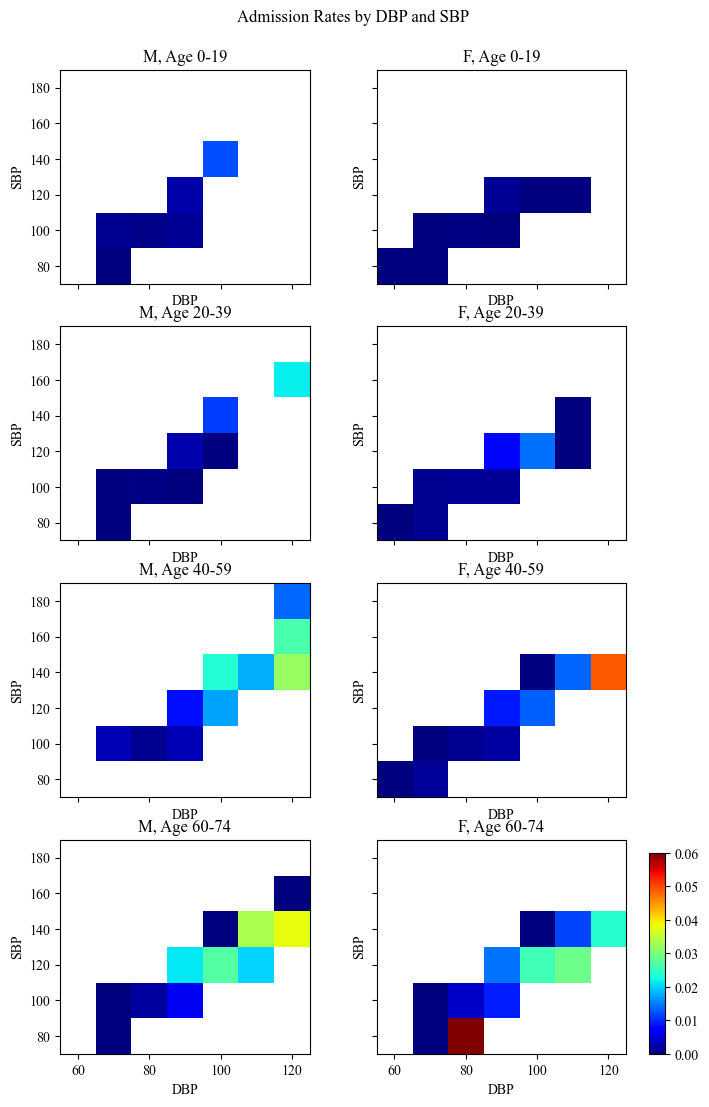

In [30]:
%matplotlib inline
#Cell_30.
sexes = ['M', 'F']
ages = {0: 'Age 0-19', 20: 'Age 20-39', 40: 'Age 40-59', 60: 'Age 60-74'}

fig, axes = plt.subplots(4, 2, figsize=(8, 12), sharex=True, sharey=True)
fig.suptitle('Admission Rates by DBP and SBP')
for i in [0, 1]:
    sex = sexes[i]
    for j in np.arange(4):
        alb = j * 20
        im = axes[j, i].imshow(dict_summary[sex][alb],
                               vmin=0, vmax=0.06, cmap='jet')
        axes[j, i].set_xticklabels(xticks)
        axes[j, i].set_yticklabels(yticks)
        axes[j, i].invert_yaxis()
        axes[j, i].set_title(sex + ', ' + ages[alb])
        axes[j, i].set_xlabel('DBP')
        axes[j, i].set_ylabel('SBP')

# fig.colorbar(im)
axpos = axes[j, i].get_position()
cbar_ax = fig.add_axes([0.87, axpos.y0, 0.02, axpos.height])
cbar = fig.colorbar(im, cax=cbar_ax)
fig.subplots_adjust(right=0.85, top=0.93)

In [31]:
#Cell_31.
df_summary2 = df_summary[df_summary['exposure']>0]
print(df_summary2.shape)
display(df_summary2.head())


(73, 7)


,sex,alb,dbp,sbp,exposure,event,rate
0,M,0,40,80,547.0,0.0,0.000000
0,M,0,60,80,1029.0,1.0,0.000972
0,M,0,60,100,8954.0,6.0,0.000670
0,M,0,60,120,834.0,1.0,0.001199
0,M,0,80,120,4840.0,11.0,0.002273


In [32]:
#Cell_32.
pd.pivot_table(df_summary2,index='sex',columns='alb',aggfunc='count').iloc[:,0:4]

dbp           
alb  0  20  40  60
sex               
F     8  9  10  11
M     6  8  10  11

In [33]:
#Cell_33.
df_summary2.groupby('sex').mean()

,alb,dbp,sbp,exposure,event,rate
sex,,,,,,
F,32.631579,68.947368,116.842105,1754.789474,7.000000,0.009290
M,34.857143,79.428571,127.428571,2054.400000,11.457143,0.009894


In [34]:
#Cell_34.
print(df_summary2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 0 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       73 non-null     object 
 1   alb       73 non-null     int64  
 2   dbp       73 non-null     int64  
 3   sbp       73 non-null     int64  
 4   exposure  73 non-null     float64
 5   event     73 non-null     float64
 6   rate      73 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.6+ KB
None


In [35]:
#Cell_35.
#test of means
df_m=df_summary2[df_summary2['sex']=='M']
df_f=df_summary2[df_summary2['sex']=='F']
display(df_m.head())

,sex,alb,dbp,sbp,exposure,event,rate
0,M,0,40,80,547.0,0.0,0.000000
0,M,0,60,80,1029.0,1.0,0.000972
0,M,0,60,100,8954.0,6.0,0.000670
0,M,0,60,120,834.0,1.0,0.001199
0,M,0,80,120,4840.0,11.0,0.002273


In [36]:
#Cell_36.
m_rate=df_m['rate']
f_rate=df_f['rate']

#平均の差の検定
from scipy import stats

stat_t, p_val=stats.ttest_ind(m_rate,f_rate,equal_var=False)
print(p_val)


0.8783319455463997


In [37]:
import numpy as np
print(np.mean(m_rate))
print(np.mean(f_rate))

0.009894101218015842
0.009290391498535661


In [38]:
#Cell_37.
df_summary2['alb'].unique()

array([ 0, 20, 40, 60])

In [39]:
#Cell_38.
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

formula= 'dbp ~ C(sex) + C(alb) + C(sex):C(alb)'
model=ols(formula,df_summary2).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                     sum_sq    df         F    PR(>F)
C(sex)          1775.443446   1.0  3.388100  0.070234
C(alb)          2395.843912   3.0  1.524006  0.216615
C(sex):C(alb)    489.107102   3.0  0.311123  0.817263
Residual       34061.515152  65.0       NaN       NaN


In [40]:
# multiple regression.

In [41]:
#Cell_39.
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
plt.rcParams['font.family'] = 'Yu Mincho' # for Japanese in graph (Win)

In [42]:
#Cell_40.
X = df_summary2[['sex','alb','dbp','sbp']]
Y = df_summary2[['rate']]

In [43]:
#Cell_41.
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 0 to 0
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     73 non-null     object
 1   alb     73 non-null     int64 
 2   dbp     73 non-null     int64 
 3   sbp     73 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.9+ KB
None


In [44]:
#Cell_42.
X['alb'] = X['alb'].replace({
    0:1,20:2,40:3,60:4,
})

In [45]:
#Cell_43.
display(X.head())

,sex,alb,dbp,sbp
0,M,1,40,80
0,M,1,60,80
0,M,1,60,100
0,M,1,60,120
0,M,1,80,120


In [46]:
#Cell_44.
X_dumm=pd.get_dummies(X,drop_first=True,dtype='uint8')
display(X_dumm.head())

,alb,dbp,sbp,sex_M
0,1,40,80,1
0,1,60,80,1
0,1,60,100,1
0,1,60,120,1
0,1,80,120,1


In [47]:
#Cell_45.
X_dumm_c=sm.add_constant(X_dumm)
model=sm.OLS(Y,X_dumm_c)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     6.283
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           0.000231
Time:                        01:00:35   Log-Likelihood:                 205.79
No. Observations:                  73   AIC:                            -401.6
Df Residuals:                      68   BIC:                            -390.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0204      0.007     -2.877      0.0

In [48]:
#Cell_46.
X_scaled_ar = scale(X_dumm_c)
y_scaled_ar = scale(Y)
model = sm.OLS(y_scaled_ar, X_scaled_ar)
results_scaled = model.fit()
print(results_scaled.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.270
Model:                            OLS   Adj. R-squared (uncentered):              0.228
Method:                 Least Squares   F-statistic:                              6.375
Date:                Thu, 24 Oct 2024   Prob (F-statistic):                    0.000200
Time:                        01:00:35   Log-Likelihood:                         -92.103
No. Observations:                  73   AIC:                                      192.2
Df Residuals:                      69   BIC:                                      201.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [49]:
#Cell_47.
X_test = pd.DataFrame([[1,2, 85, 100,0],
                       [1,3, 100, 150,1],
                        ],
                        columns=X_dumm_c.columns)  # example
print('X for prediction:')
display(X_test)

X for prediction:


,const,alb,dbp,sbp,sex_M
0,1,2,85,100,0
1,1,3,100,150,1


In [50]:
#Cell_48.
y_test = results.predict(X_test)
print('Predicted y:')
print(y_test)

Predicted y:
0   -0.004936
1    0.012033
dtype: float64
